# Credit Card Fraud Detection  
### Machine Learning Classification Project

This notebook presents a machine learning approach to credit card fraud detection under extreme class imbalance. The analysis focuses on appropriate evaluation metrics, threshold decisions, and model comparison from both a technical and practical perspective.


## 1. Introduction & Problem Statement

Credit card fraud detection is a challenging classification problem due to the extreme imbalance between legitimate and fraudulent transactions. In this project, we analyze transaction-level data and evaluate different machine learning models with a strong emphasis on metrics that are suitable for imbalanced scenarios.

The goal is to assess model performance from both a technical and practical perspective, considering the trade-off between fraud detection and false alerts.


In [1]:
# Core libraries
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve,
    precision_recall_curve
)

# Settings
plt.style.use("seaborn-v0_8")
pd.set_option("display.max_columns", None)

## 2. Dataset description

In [2]:
# Load dataset
df = pd.read_csv("data/creditcard.csv")

# Basic inspection
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
class_counts = df["Class"].value_counts()
class_percentages = df["Class"].value_counts(normalize=True) * 100

print("Class distribution: ")
display(pd.DataFrame({
    "Count": class_counts,
    "Percentage (%)": class_percentages
}))

Class distribution: 


,Count,Percentage (%)
Class,,
0,284315,99.827251
1,492,0.172749


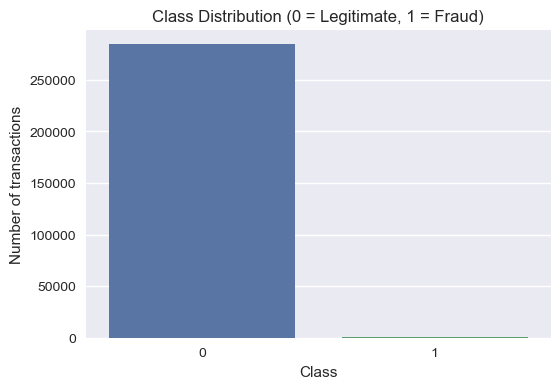

In [4]:
plt.figure(figsize=(6,4))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title("Class Distribution (0 = Legitimate, 1 = Fraud)")
plt.xlabel("Class")
plt.ylabel("Number of transactions")
plt.show()

The features `V1` to `V28` correspond to anonymized variables obtained through a PCA transformation applied to the original data in order to preserve confidentiality. Although their original meaning is unknown, these components retain relevant information for fraud detection.


## 3. Exploratory Data Analysis (EDA)
### 3.1 Amount and Time Distribution

c:\Users\niico\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


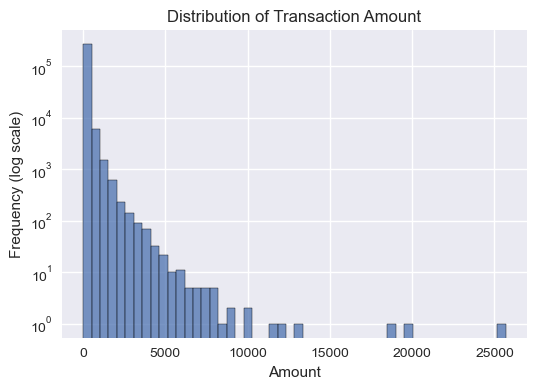

In [5]:
plt.figure(figsize=(6,4))
sns.histplot(df["Amount"], bins=50, log_scale=(False, True))
plt.title("Distribution of Transaction Amount")
plt.xlabel("Amount")
plt.ylabel("Frequency (log scale)")
plt.show()


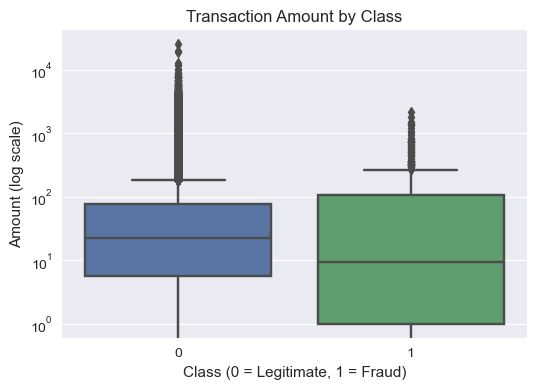

In [6]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Class", y="Amount", data=df)
plt.yscale("log")
plt.title("Transaction Amount by Class")
plt.xlabel("Class (0 = Legitimate, 1 = Fraud)")
plt.ylabel("Amount (log scale)")
plt.show()


c:\Users\niico\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


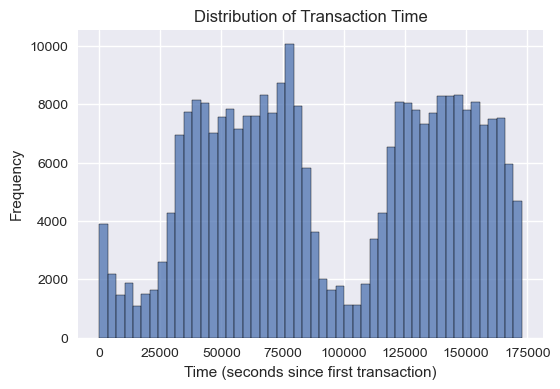

In [7]:
plt.figure(figsize=(6,4))
sns.histplot(df["Time"], bins=50)
plt.title("Distribution of Transaction Time")
plt.xlabel("Time (seconds since first transaction)")
plt.ylabel("Frequency")
plt.show()


c:\Users\niico\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\niico\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


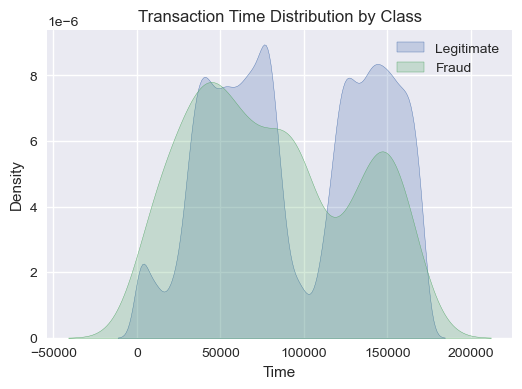

In [8]:
plt.figure(figsize=(6,4))
sns.kdeplot(df[df["Class"] == 0]["Time"], label="Legitimate", fill=True)
sns.kdeplot(df[df["Class"] == 1]["Time"], label="Fraud", fill=True)
plt.title("Transaction Time Distribution by Class")
plt.xlabel("Time")
plt.legend()
plt.show()


Transaction amounts show a highly skewed distribution with a long tail, which is typical in financial data. Time-related features do not exhibit abnormal patterns but require scaling prior to model training.


### 3.2. PCA Variables (`V1`-`V28`)

In [9]:
features = [col for col in df.columns if col.startswith("V")]

mean_diff = (df.groupby("Class")[features].mean().T)

mean_diff["abs_diff"] = abs(mean_diff[1] - mean_diff[0])
mean_diff.sort_values("abs_diff", ascending=False).head(10)


Class,0,1,abs_diff
V3,0.012171,-7.033281,7.045452
V14,0.012064,-6.971723,6.983787
V17,0.011535,-6.665836,6.677371
V12,0.010832,-6.259393,6.270225
V10,0.009824,-5.676883,5.686707
V7,0.009637,-5.568731,5.578368
V1,0.008258,-4.771948,4.780206
V4,-0.007860,4.542029,4.549889
V16,0.007164,-4.139946,4.147110
V11,-0.006576,3.800173,3.806749


Despite the lack of semantic interpretability, several PCA components display distinct distributional patterns, suggesting strong discriminative potential between fraudulent and legitimate transactions.


### Key Insigths from EDA

- The dataset presents an extreme class imbalance, with fraudulent transactions representing a very small fraction of the total.
- Transaction amounts show a highly skewed distribution, with fraudulent transactions generally involving smaller amounts.
- Several PCA-transformed features exhibit clear distributional differences between fraudulent and legitimate transactions, indicating strong discriminative potential despite feature anonymization.


## 4. Data Preprocessing
This section describes the preprocessing steps applied prior to model training, with particular attention to preventing data leakage and preserving the original class distribution.
### 4.1. Feature-Target Separation

In [11]:
X = df.drop("Class", axis=1)
y = df["Class"]

X.shape, y.shape

((284807, 30), (284807,))

### 4.2. Train/Test Split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.2,     # 80% train, 20% test
    random_state=42,
    stratify=y           # class distribution
)

In [13]:
# Verify class proportions
pd.DataFrame({
    "Train (%)": y_train.value_counts(normalize=True) * 100,
    "Test (%)": y_test.value_counts(normalize=True) * 100
})

,Train (%),Test (%)
Class,,
0,99.827075,99.827955
1,0.172925,0.172045


### 4.3. Feature Scaling

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[["Time", "Amount"]] = scaler.fit_transform(
    X_train[["Time", "Amount"]]
)

X_test[["Time", "Amount"]] = scaler.transform(
    X_test[["Time", "Amount"]]
)

In [15]:
X_train[["Time", "Amount"]].describe()

,Time,Amount
count,2.278450e+05,2.278450e+05
mean,-1.407707e-16,-2.020811e-17
std,1.000002e+00,1.000002e+00
min,-1.998073e+00,-3.516894e-01
25%,-8.561495e-01,-3.291944e-01
50%,-2.122647e-01,-2.639429e-01
75%,9.366285e-01,-4.262209e-02
max,1.640549e+00,1.021170e+02


Only the `Time` and `Amount` features were scaled, as the remaining variables correspond to PCA-transformed components that are already standardized.


## 5. Modeling
Two models are evaluated in this section: a logistic regression baseline and a Random Forest classifier. The comparison focuses on appropriate metrics for imbalanced classification problems.
### 5.1. Baseline Model: Logistic Regression
Logistic regression is used as a baseline model due to its simplicity and interpretability. Its performance highlights the limitations of default decision thresholds in highly imbalanced classification problems.


In [16]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(
    max_iter=1000,
    class_weight="balanced",
    random_state=42
)

log_reg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [17]:
y_pred = log_reg.predict(X_test)

y_proba = log_reg.predict_proba(X_test)[:, 1]

### 5.2. Model Evaluation Metrics
Accuracy is not considered a reliable metric in this context due to the severe class imbalance. Instead, recall, precision, and ranking-based metrics are emphasized.
#### Confusion Matrix

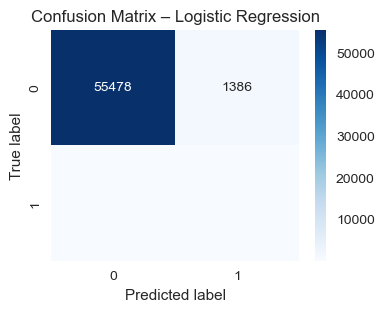

In [18]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4,3))
sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix – Logistic Regression")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

In [19]:
matrix

array([[55478,  1386],
       [    8,    90]], dtype=int64)

#### Classification Report

In [20]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9999    0.9756    0.9876     56864
           1     0.0610    0.9184    0.1144        98

    accuracy                         0.9755     56962
   macro avg     0.5304    0.9470    0.5510     56962
weighted avg     0.9982    0.9755    0.9861     56962



#### ROC-AUC

In [21]:
from sklearn.metrics import roc_auc_score, roc_curve

roc_auc = roc_auc_score(y_test, y_proba)
roc_auc

0.9720887035877942

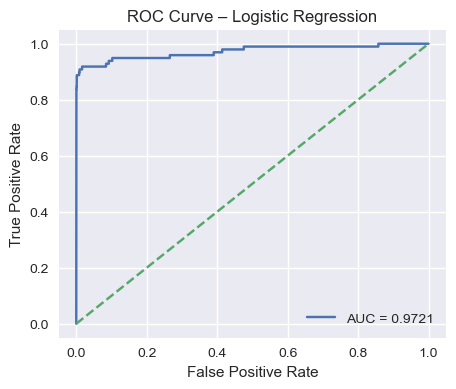

In [22]:
fpr, tpr, _ = roc_curve(y_test, y_proba)

plt.figure(figsize=(5,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Logistic Regression")
plt.legend()
plt.show()

The ROC–AUC score indicates that the model is able to discriminate between fraudulent and legitimate transactions significantly better than random guessing. However, given the extreme class imbalance, ROC–AUC alone is not sufficient to assess performance.


### 5.3 Precision-Recall Curve


In [23]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, pr_thresholds = precision_recall_curve(y_test, y_proba)

avg_precision = average_precision_score(y_test, y_proba)

avg_precision

0.7189356348101029

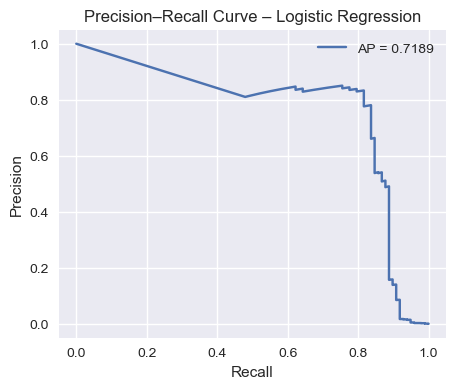

In [24]:
plt.figure(figsize=(5,4))
plt.plot(recall, precision, label=f"AP = {avg_precision:.4f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve – Logistic Regression")
plt.legend()
plt.grid(True)
plt.show()


The Average Precision (AP) score of approximately 0.72 indicates that the model is able to rank fraudulent transactions above legitimate ones with reasonable effectiveness. While not perfect, this result suggests that the baseline model captures meaningful patterns in the data and provides a solid foundation for further optimization through threshold tuning or more complex models.

The Precision–Recall curve provides a threshold-independent view of model performance and is particularly informative in highly imbalanced classification problems.


### 5.4. Threshold Analysis

In [25]:
from sklearn.metrics import confusion_matrix

def evaluate_threshold(threshold):
    y_pred_thr = (y_proba >= threshold).astype(int)

    TN, FP, FN, TP = confusion_matrix(y_test, y_pred_thr).ravel()

    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0

    return precision, recall, TP, FN, FP

In [26]:
thresholds = np.linspace(0.01, 0.95, 10)

results = []

for t in thresholds:
    precision, recall, TP, FN, FP = evaluate_threshold(t)
    results.append([t, precision, recall, TP, FN, FP])

threshold_df = pd.DataFrame(
    results,
    columns=["Threshold", "Precision", "Recall", "TP", "FN", "FP"]
)

threshold_df

,Threshold,Precision,Recall,TP,FN,FP
0,0.010000,0.002418,0.989796,97,1,40022
1,0.114444,0.009144,0.948980,93,5,10078
2,0.218889,0.018131,0.928571,91,7,4928
3,0.323333,0.030457,0.918367,90,8,2865
4,0.427778,0.046948,0.918367,90,8,1827
5,0.532222,0.068807,0.918367,90,8,1218
6,0.636667,0.097374,0.908163,89,9,825
7,0.741111,0.137346,0.908163,89,9,559
8,0.845556,0.183158,0.887755,87,11,388
9,0.950000,0.390135,0.887755,87,11,136


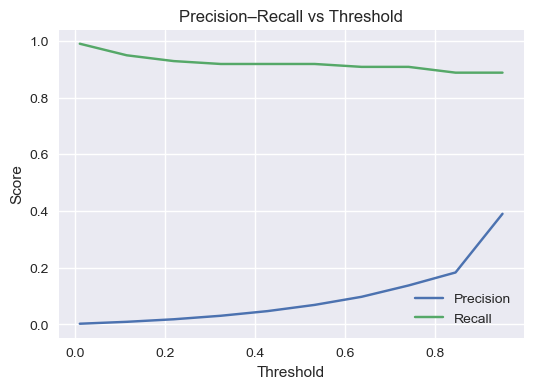

In [27]:
plt.figure(figsize=(6,4))
plt.plot(threshold_df["Threshold"], threshold_df["Precision"], label="Precision")
plt.plot(threshold_df["Threshold"], threshold_df["Recall"], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision–Recall vs Threshold")
plt.legend()
plt.grid(True)
plt.show()


The threshold analysis shows that using a strict decision threshold (0.95) leads to a precision of approximately 0.39, meaning that roughly **one out of every two to three alerts** corresponds to a real fraudulent transaction. This is achieved while maintaining a high recall (around 0.89), resulting in only a limited number of missed fraud cases.

Given the extremely low base rate of fraud in the dataset, this represents a strong practical performance and highlights the effectiveness of threshold tuning in balancing detection capability and operational cost.


## 6. Advanced Modeling: Random Forest
A Random Forest classifier is evaluated to assess whether a non-linear ensemble model can improve performance compared to the linear baseline.

In [29]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=8,
    min_samples_leaf=10,
    class_weight="balanced",
    random_state=42,
    n_jobs=1
)

rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=8,
                       min_samples_leaf=10, n_jobs=1, random_state=42)

In [30]:
y_pred_rf = rf.predict(X_test)

y_proba_rf = rf.predict_proba(X_test)[:, 1]

In [31]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_rf, digits=4))

              precision    recall  f1-score   support

           0     0.9998    0.9993    0.9995     56864
           1     0.6720    0.8571    0.7534        98

    accuracy                         0.9990     56962
   macro avg     0.8359    0.9282    0.8764     56962
weighted avg     0.9992    0.9990    0.9991     56962



#### ROC-AUC

In [32]:
from sklearn.metrics import roc_auc_score

y_proba_rf = rf.predict_proba(X_test)[:, 1]
roc_auc_rf = roc_auc_score(y_test, y_proba_rf)
roc_auc_rf

0.9762943162633653

#### Average Precision (AP)

In [33]:
from sklearn.metrics import average_precision_score

ap_rf = average_precision_score(y_test, y_proba_rf)
ap_rf

0.8106471841012265

#### Precision-Recall Curve

In [34]:
from sklearn.metrics import precision_recall_curve

precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_proba_rf)

precision_rf.max(), recall_rf.max()

(1.0, 1.0)

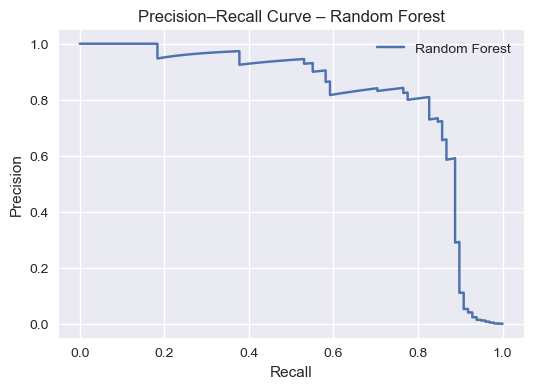

In [36]:
plt.figure(figsize=(6,4))
plt.plot(recall_rf, precision_rf, label="Random Forest")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve – Random Forest")
plt.legend()
plt.grid(True)
plt.show()


## 7. Conclusions & Model Selection
This project addressed credit card fraud detection under extreme class imbalance using both linear and non-linear models. Logistic regression provided a solid baseline and demonstrated the importance of appropriate evaluation metrics and threshold decisions.

Random Forest outperformed the baseline by achieving a strong balance between precision and recall without requiring extensive threshold tuning. With higher-quality alerts and robust ranking performance, it represents a more deployment-ready solution from a practical perspective.